AUC Score: 0.4803675573036756


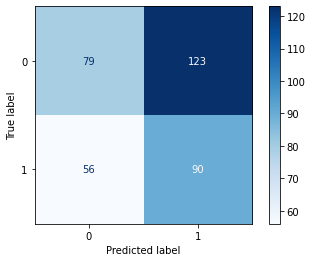

In [17]:
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt

# Load DataFrame
df = pd.read_csv('/mnt/ncshare/ozkilim/BRCA/eval_results/EVAL_FFPE_BRCA_Unimodal_Ov_embedder_HGSOC_level_0/fold_1.csv')  # Replace with your file path

# Calculate AUC
auc_score = roc_auc_score(df['Y'], df['p_1'])
print(f"AUC Score: {auc_score}")

# Convert probabilities to binary predictions (threshold 0.5)
predictions = (df['p_1'] >= 0.3).astype(int)

# Generate confusion matrix
cm = confusion_matrix(df['Y'], predictions)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

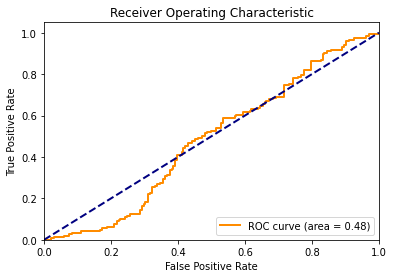

In [18]:

# Compute ROC curve
fpr, tpr, _ = roc_curve(df['Y'], df['p_1'])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()